In [619]:
import pandas as pd
import datetime
from tqdm import tqdm
import re
import optuna
import operator
import numpy as np
import matplotlib.pyplot as plt
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split
import requests
from datetime import timedelta
import pickle
from sklearn.linear_model import LinearRegression

ticker = pd.read_csv('tickerr.csv')
ticker = ticker.drop('Unnamed: 0', axis = 1)
x = np.array(ticker.values)
code = np.unique(x).tolist()
#code = listing_companies ()['ticker'].tolist()

path = 'T:/Data/Data/Data_Co_So_minute/DataMinute2/DataMinute/DataMinute'
csvfiles = []
df = pd.DataFrame()
data = []
for stock in code:
    try:
        df1 = pd.read_csv(path+'/'+stock+'.csv')
        df1['stock'] = stock
        data.append(df1)
    except:
        pass


<IPython.core.display.Javascript object>

In [650]:
code

['ACB',
 'BID',
 'BMP',
 'BVH',
 'CII',
 'CTD',
 'CTG',
 'DHG',
 'DPM',
 'EIB',
 'FPT',
 'GAS',
 'GMD',
 'GVR',
 'HDB',
 'HPG',
 'HSG',
 'KBC',
 'KDC',
 'KDH',
 'MBB',
 'MSN',
 'MWG',
 'NT2',
 'NVL',
 'PDR',
 'PLX',
 'PNJ',
 'POW',
 'PVD',
 'REE',
 'ROS',
 'SAB',
 'SBT',
 'SSI',
 'STB',
 'TCB',
 'TCH',
 'TPB',
 'VCB',
 'VHM',
 'VIB',
 'VIC',
 'VJC',
 'VNM',
 'VPB',
 'VRE']

In [620]:
def test_live(sample_duration):
    def vn30f():
        return requests.get("https://services.entrade.com.vn/chart-api/chart?from=1651727820&resolution=1&symbol=VN30F1M&to=9999999999").json()
    vn30fm = pd.DataFrame(vn30f()).iloc[:,:6]
    vn30fm['t'] = vn30fm['t'].astype(int).apply(lambda x: datetime.datetime.utcfromtimestamp(x) + timedelta(hours = 7))
    vn30fm.columns = ['Date','Open','High','Low','Close','Volume']
    s = pd.read_csv('C:\python\VN30F1M.csv')
    s['Date'] = pd.to_datetime(s['Date']) + timedelta(hours =7)
    ohlc_dict = {                                                                                                             
        'Open': 'first',                                                                                                    
        'High': 'max',                                                                                                       
        'Low': 'min',                                                                                                        
        'Close': 'last',                                                                                                    
        'Volume': 'sum',}
    vn30fm = pd.DataFrame(vn30f()).iloc[:,:6]
    vn30fm['t'] = vn30fm['t'].astype(int).apply(lambda x: datetime.datetime.utcfromtimestamp(x) + timedelta(hours = 7))
    vn30fm.columns = ['Date','Open','High','Low','Close','Volume']
    def process_data(input_df):
        vn30train = pd.DataFrame(input_df.resample(str(sample_duration)+'Min', on='Date', label='left').apply(ohlc_dict).dropna()).reset_index()#change s
        vn30train['Date'] = [str(i)[:16] for i in vn30train['Date']]
        return vn30train
    vn30f_base = pd.concat([process_data(vn30fm), process_data(s)]).sort_values('Date').drop_duplicates('Date').sort_values('Date')
    return vn30f_base
df20 = test_live(15)

In [621]:
start_day1 = '2017-7-23'
end_day1 = '2018-1-23'
q1 = ticker.iloc[:, 0].values.tolist()
start_day2 = '2018-1-22'
end_day2 = '2018-7-24'
q2 = ticker.iloc[:, 1].values.tolist()
start_day3 = '2018-7-23'
end_day3 = '2019-2-12'
q3 = ticker.iloc[:, 2].values.tolist()
start_day4 = '2019-2-11'
end_day4 = '2019-8-06'
q4 = ticker.iloc[:, 3].values.tolist()
start_day5 = '2019-8-05'
end_day5 = '2020-2-04'
q5 = ticker.iloc[:, 4].values.tolist()
start_day6 = '2020-2-03'
end_day6 = '2020-8-04'
q6 = ticker.iloc[:, 5].values.tolist()
start_day7 = '2020-8-03'
end_day7 = '2021-1-03'
q7 = ticker.iloc[:, 6].values.tolist()
start_day8 = '2021-1-02'
end_day8 = '2021-8-03'
q8 = ticker.iloc[:, 7].values.tolist()
start_day9 = '2021-8-02'
end_day9 = '2022-1-18'
q9 = ticker.iloc[:, 8].values.tolist()
start_day10 = '2022-1-17'
end_day10 ='2022-7-20'
q10 = ticker.iloc[:, 9].values.tolist()

In [622]:
def matrix(data, q1, start_day, end_day):
    # q1 = ticker.iloc[:, 0].values.tolist()
    data_q1 = []
    for i in range(len(data)):
        #q1 = ticker.iloc[:, 0].values.tolist()
        if str(data[i]['stock'].iloc[1]) in q1:
            data_q1.append(data[i])
    df = pd.DataFrame()
    dff = pd.DataFrame()
    df0 = pd.DataFrame()
    for i in range(len(q1)):
        dff = pd.DataFrame()
        df0 = pd.DataFrame()
        dff = data_q1[i]
        dff.Date = pd.to_datetime(dff.Date)# + timedelta(hours=7)
        dff = dff.set_index('Date')
        df0 = dff[['Close']].resample('15T').last().dropna().reset_index().merge(dff[['Volume']].resample('15T').sum().dropna().reset_index(), how = 'left', on = 'Date')
        df0['trend'+str(i)] = (df0.Volume / df0.Volume.rolling(5).mean()) * df0.Close.pct_change(periods=5)
        df0 = df0.loc[df0['Date'].dt.date > pd.Timestamp(start_day)].drop(['Close', 'Volume'], axis = 1)
        df0 = df0.loc[df0['Date'].dt.date < pd.Timestamp(end_day)]
        if i == 0:
            df = df0
            dff = pd.DataFrame()
            df0 = pd.DataFrame()
        else:
            df = df.merge(df0, how = 'left', on = 'Date')
            dff = pd.DataFrame()
            df0 = pd.DataFrame()
    return df


In [623]:
df1 = matrix(data, q1, start_day1, end_day1)
df2 = matrix(data, q2, start_day2, end_day2)
df3 = matrix(data, q3, start_day3, end_day3)
df4 = matrix(data, q4, start_day4, end_day4)
df5 = matrix(data, q5, start_day5, end_day5)
df6 = matrix(data, q6, start_day6, end_day6)
df7 = matrix(data, q7, start_day7, end_day7)
df8 = matrix(data, q8, start_day8, end_day8)
df9 = matrix(data, q9, start_day9, end_day9)
df10 = matrix(data, q10, start_day10, end_day10)
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the

In [624]:
df20.Date.iloc[1]

'2017-08-10 09:30'

In [625]:
df_gmt = df
df_gmt.Date = pd.to_datetime(df_gmt.Date) + timedelta(hours=7)
# df1015 = df_gmt.loc[df_gmt['Date'].dt.time == datetime.time(10, 15)]
df20.Date = pd.to_datetime(df20.Date)
df1430 = df20[['Date', 'Open']].loc[df20['Date'].dt.time == datetime.time(14, 00)]
df1010 = df20[['Date', 'Open']].loc[df20['Date'].dt.time == datetime.time(10, 15)]
df1430['day'] = [str(i)[:10] for i in df1430.Date]
df1010['day'] = [str(i)[:10] for i in df1010.Date]
dfpct = df1430.merge(df1010, how = 'inner', on = 'day')
dfpct['pct'] = (dfpct['Open_x'] - dfpct['Open_y'])/dfpct['Open_y']

In [626]:
df1015 = df_gmt.loc[df_gmt['Date'].dt.time == datetime.time(10, 15)]
df1015.Date = [str(i)[:19] for i in df1015.Date]

C:\Users\Admin\AppData\Local\Temp\ipykernel_9528\2943812837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1015.Date = [str(i)[:19] for i in df1015.Date]


In [627]:
df_merge = dfpct[['day', 'pct']]
df_merge['day'] = [(str(i) + ' 10:15:00') for i in df_merge['day']]
df_merge.columns = ['Date', 'pct']

C:\Users\Admin\AppData\Local\Temp\ipykernel_9528\1988739810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['day'] = [(str(i) + ' 10:15:00') for i in df_merge['day']]


In [628]:
ds = df1015.merge(df_merge, how = 'inner', on = 'Date')

In [629]:
ds = ds.dropna()

In [648]:
pct = pd.DataFrame(ds.pct * 100)
len(pct.loc[pct['pct'] > 0]) / len(pct)

0.47755834829443444

In [649]:
pct

pct
0    -0.480000
2     0.201045
3    -0.199920
5    -0.053462
6     0.040426
...        ...
1215  0.722892
1216  0.230833
1218 -0.180624
1219 -0.303403
1220 -0.090677

[1114 rows x 1 columns]

In [630]:
def create_XY(ds):
    X = ds.drop(['pct', 'Date'], axis = 1)
    Y = ds['pct']
    X_train = X.loc[:900]
    X_test = X.loc[900:]
    Y_train = Y.loc[:900]
    Y_test = Y.loc[900:]
    return X_train, Y_train, X_test, Y_test
X_train, Y_train, X_test, Y_test = create_XY(ds)
X_test

trend0    trend1    trend2    trend3    trend4    trend5    trend6  \
900  -0.002178  0.010895  0.012306  0.000000  0.000000 -0.001398 -0.004451   
901  -0.003787 -0.004999  0.000000  0.003577  0.001886  0.006255 -0.004348   
902  -0.001519  0.009318  0.000901  0.035011  0.003545 -0.001312  0.006995   
903   0.003588 -0.010967  0.001991 -0.001744 -0.017718 -0.029891  0.008252   
904  -0.001432 -0.014822 -0.009212 -0.001985 -0.018015  0.011918  0.001471   
...        ...       ...       ...       ...       ...       ...       ...   
1215  0.007990  0.000000  0.001780  0.000000  0.007410  0.014466  0.249846   
1216 -0.006801 -0.004836  0.030474  0.019791 -0.004122 -0.047626  0.022158   
1218  0.002335  0.008100 -0.006084  0.006700  0.003961 -0.005485  0.001926   
1219  0.002083  0.001524 -0.004853  0.001245  0.010641 -0.002133  0.006372   
1220 -0.003360 -0.010663 -0.002707 -0.002843 -0.006470  0.009645 -0.001988   

        trend7    trend8    trend9  ...   trend20   trend21   trend22  \
900  -0.003050  0.007978  0.004978  ...  0.002881 -0.023747  0.091849   
901   0.014168 -0.017106 -0.011059  ... -0.006788 -0.034102  0.001447   
902   0.014769  0.003838 -0.005468  ...  0.000000 -0.019969 -0.002751   
903   0.001936  0.002786 -0.001743  ...  0.003708 -0.023216  0.000665   
904  -0.003026 -0.014111  0.057062  ...  0.001236 -0.008647  0.021687   
...        ...       ...       ...  ...       ...       ...       ...   
1215  0.029586 -0.002407  0.008373  ...  0.001725  0.003341  0.012965   
1216  0.001391  0.010840 -0.000830  ...  0.005494 -0.001335  0.010070   
1218  0.005197  0.031172 -0.000247  ...  0.000000  0.009862  0.002968   
1219  0.010729 -0.003125 -0.002456  ...  0.003852  0.008597  0.015889   
1220  0.000000 -0.007736 -0.006771  ...  0.004442 -0.006098 -0.003277   

       trend23   trend24   trend25   trend26   trend27   trend28   trend29  
900  -0.013551 -0.011299  0.006151  0.008119 -0.010768  0.001644  0.016838  
901  -0.020586 -0.005295 -0.008937  0.004518 -0.003026  0.013006 -0.006904  
902  -0.018343 -0.005326 -0.001338 -0.010544 -0.000403  0.036384 -0.001374  
903   0.005133  0.005791  0.014545  0.000000  0.001331  0.046015  0.001857  
904   0.005295  0.049483  0.127784  0.000750  0.014409  0.055570  0.075018  
...        ...       ...       ...       ...       ...       ...       ...  
1215  0.001311 -0.008152 -0.004375 -0.016674 -0.000918  0.005784 -0.004459  
1216 -0.006006 -0.027587 -0.012145 -0.000253 -0.001106  0.008875 -0.012499  
1218  0.007674 -0.002606 -0.007231 -0.004274  0.000873  0.002769  0.000000  
1219  0.004196 -0.002582 -0.011672 -0.001189  0.006364  0.018489 -0.003695  
1220  0.000000 -0.004253  0.007263 -0.001225  0.008727 -0.011234 -0.010593  

[316 rows x 30 columns]

In [631]:
for i in X_test.index:
    # print(i)
    X_test.loc[X_test.index==i] = pd.Series((X_test.loc[X_test.index==i]).values[0].tolist()).sort_values().tolist()

In [632]:
for i in X_train.index:
    # print(i)
    X_train.loc[X_train.index==i] = pd.Series((X_train.loc[X_train.index==i]).values[0].tolist()).sort_values().tolist()

In [633]:
X_train

trend0    trend1    trend2    trend3    trend4        trend5    trend6  \
0   -0.058615 -0.039142 -0.012147 -0.004302 -0.001135 -1.130400e-03 -0.000965   
2   -0.006647 -0.004785 -0.003974 -0.003842 -0.001369 -9.547875e-12  0.000000   
3   -0.035639 -0.023332 -0.014482 -0.012098 -0.011746 -9.903320e-03 -0.008520   
5   -0.032780 -0.019978 -0.011114 -0.006598 -0.005589 -4.989818e-03 -0.004840   
6   -0.047034 -0.014722 -0.006781 -0.005926 -0.005295 -2.470852e-03 -0.002448   
..        ...       ...       ...       ...       ...           ...       ...   
896 -0.008460 -0.003435  0.000000  0.003639  0.004227  5.319653e-03  0.006092   
897 -0.006757 -0.004716 -0.003752  0.000000  0.002168  2.506468e-03  0.003037   
898 -0.012571 -0.010786 -0.004241 -0.002143 -0.001707 -1.621221e-03 -0.000872   
899 -0.010254 -0.010182 -0.007312 -0.007309 -0.007010 -4.969070e-03 -0.004827   
900 -0.023747 -0.018007 -0.013551 -0.011299 -0.010768 -7.933188e-03 -0.007801   

       trend7    trend8    trend9  ...   trend20   trend21   trend22  \
0   -0.000807 -0.000614 -0.000027  ...  0.003448  0.004234  0.007881   
2    0.000000  0.000000  0.000000  ...  0.004909  0.005249  0.007022   
3   -0.007739 -0.004544 -0.003001  ...  0.000700  0.001139  0.001227   
5   -0.003883 -0.003119 -0.002732  ...  0.000408  0.000488  0.000862   
6   -0.002206 -0.001562 -0.001182  ...  0.000370  0.000795  0.001041   
..        ...       ...       ...  ...       ...       ...       ...   
896  0.006263  0.006724  0.006956  ...  0.014734  0.016481  0.016667   
897  0.003573  0.003675  0.004049  ...  0.013389  0.013494  0.016103   
898  0.000000  0.000000  0.000000  ...  0.005768  0.006576  0.008726   
899 -0.003537 -0.002822 -0.001662  ...  0.004442  0.011537  0.012402   
900 -0.006011 -0.004934 -0.004451  ...  0.004978  0.006151  0.007978   

      trend23   trend24   trend25   trend26   trend27   trend28   trend29  
0    0.008245  0.011477  0.013838  0.017686  0.021175  0.022808  0.044935  
2    0.007141  0.008879  0.009865  0.010929  0.016142  0.034973  0.048822  
3    0.002587  0.002902  0.004184  0.004296  0.005263  0.007504  0.026847  
5    0.001817  0.003038  0.005387  0.005873  0.006234  0.008500  0.043040  
6    0.001097  0.002467  0.002740  0.004748  0.004890  0.005726  0.011414  
..        ...       ...       ...       ...       ...       ...       ...  
896  0.016930  0.016971  0.018921  0.020978  0.026428  0.034730  0.049300  
897  0.016150  0.017698  0.018335  0.021310  0.030335  0.030928  0.085710  
898  0.008821  0.010947  0.013503  0.014137  0.018993  0.022306  0.035361  
899  0.013007  0.018578  0.020658  0.022210  0.025868  0.026685  0.049959  
900  0.008119  0.008388  0.010895  0.012306  0.015303  0.016838  0.091849  

[799 rows x 30 columns]

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

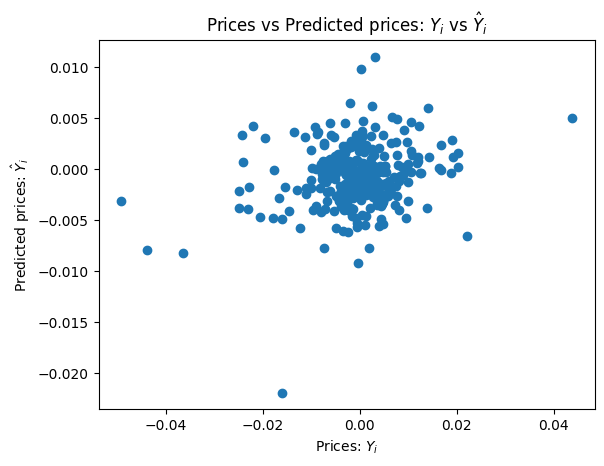

In [634]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [635]:
Y_pred

array([-3.10261616e-04, -3.85753494e-03, -1.93921485e-03,  2.43412566e-03,
        3.11208945e-03, -6.89305004e-04,  2.00591837e-03,  3.62179297e-03,
        1.49025725e-04,  4.29445413e-03, -4.16180064e-03,  1.35741885e-03,
       -2.15229276e-03, -2.06959070e-04,  2.80364257e-03,  3.15211005e-03,
        1.25189085e-03,  5.12569855e-03, -2.10346236e-03,  1.00336624e-03,
        1.65816984e-03,  3.00863816e-04,  2.17234069e-05, -3.08140672e-03,
        3.33311847e-03,  3.49983686e-03,  2.00973362e-03, -3.77018323e-04,
       -1.77219675e-03, -1.23821370e-03, -4.12044683e-04,  1.71436881e-04,
       -2.13554321e-04, -4.03148960e-03, -4.77949293e-05, -6.49553993e-03,
       -7.67875937e-03,  2.55676701e-03,  4.69015437e-03,  3.43652109e-03,
       -3.95795336e-03,  6.84705847e-04,  2.30706921e-04,  1.22476357e-03,
        5.98478877e-03,  3.28311697e-03, -4.61292478e-03, -3.80412443e-03,
       -1.64722433e-03, -2.38128694e-03, -2.78752124e-03,  2.56698197e-03,
        4.19246687e-03, -

In [636]:
test = pd.DataFrame(Y_test)
test.pct = test.pct * 100
test['predict'] = Y_pred * 100
test['per'] = test.pct * test['predict']

In [637]:
len(test.loc[test.per >= 0]) / len(test)

0.5348101265822784

In [638]:
ds

Date    trend0    trend1    trend2    trend3    trend4  \
0     2017-08-10 10:15:00  0.000000  0.021175  0.004234  0.013838 -0.000027   
2     2017-08-14 10:15:00  0.004365  0.000000  0.005249  0.009865  0.000075   
3     2017-08-15 10:15:00 -0.004544  0.005263  0.000275  0.000215 -0.000891   
5     2017-08-17 10:15:00 -0.006598  0.000488 -0.000848 -0.004840  0.000862   
6     2017-08-21 10:15:00 -0.002448 -0.001089 -0.047034  0.000370  0.000795   
...                   ...       ...       ...       ...       ...       ...   
1215  2022-07-12 10:15:00  0.007990  0.000000  0.001780  0.000000  0.007410   
1216  2022-07-13 10:15:00 -0.006801 -0.004836  0.030474  0.019791 -0.004122   
1218  2022-07-15 10:15:00  0.002335  0.008100 -0.006084  0.006700  0.003961   
1219  2022-07-18 10:15:00  0.002083  0.001524 -0.004853  0.001245  0.010641   
1220  2022-07-19 10:15:00 -0.003360 -0.010663 -0.002707 -0.002843 -0.006470   

        trend5    trend6    trend7    trend8  ...   trend21   trend22  \
0     0.000000  0.008245  0.002567  0.001080  ...  0.007881 -0.039142   
2     0.001620  0.048822  0.000000 -0.001369  ...  0.000758  0.000736   
3     0.000000 -0.001639  0.004296 -0.011746  ... -0.012098  0.000700   
5     0.000000  0.006234 -0.001531  0.003038  ...  0.000000  0.001817   
6    -0.002206  0.004890  0.000000  0.000215  ...  0.001097  0.000236   
...        ...       ...       ...       ...  ...       ...       ...   
1215  0.014466  0.249846  0.029586 -0.002407  ...  0.003341  0.012965   
1216 -0.047626  0.022158  0.001391  0.010840  ... -0.001335  0.010070   
1218 -0.005485  0.001926  0.005197  0.031172  ...  0.009862  0.002968   
1219 -0.002133  0.006372  0.010729 -0.003125  ...  0.008597  0.015889   
1220  0.009645 -0.001988  0.000000 -0.007736  ... -0.006098 -0.003277   

       trend23   trend24   trend25   trend26   trend27   trend28  \
0    -0.012147 -0.058615  0.000000  0.011477 -0.001130  0.000000   
2     0.034973  0.016142  0.000000  0.007022  0.004909  0.000000   
3    -0.007739 -0.023332  0.002902  0.000000  0.000000 -0.035639   
5     0.000408  0.005387  0.000000 -0.004990 -0.001728 -0.019978   
6    -0.014722 -0.001115 -0.006781  0.002740 -0.001182 -0.000925   
...        ...       ...       ...       ...       ...       ...   
1215  0.001311 -0.008152 -0.004375 -0.016674 -0.000918  0.005784   
1216 -0.006006 -0.027587 -0.012145 -0.000253 -0.001106  0.008875   
1218  0.007674 -0.002606 -0.007231 -0.004274  0.000873  0.002769   
1219  0.004196 -0.002582 -0.011672 -0.001189  0.006364  0.018489   
1220  0.000000 -0.004253  0.007263 -0.001225  0.008727 -0.011234   

           trend29       pct  
0     3.448341e-03 -0.004800  
2    -9.547875e-12  0.002010  
3    -8.311429e-04 -0.001999  
5     8.499573e-03 -0.000535  
6     0.000000e+00  0.000404  
...            ...       ...  
1215 -4.459259e-03  0.007229  
1216 -1.249880e-02  0.002308  
1218  0.000000e+00 -0.001806  
1219 -3.694785e-03 -0.003034  
1220 -1.059251e-02 -0.000907  

[1114 rows x 32 columns]

In [601]:
test['Date'] = ds.Date.loc[900:]

In [602]:
test

pct   predict       per                 Date
900   0.103834 -0.031026 -0.003222  2021-04-07 10:15:00
901  -0.710522 -0.385753  0.274086  2021-04-08 10:15:00
902   0.128123 -0.193921 -0.024846  2021-04-09 10:15:00
903   1.675933  0.243413  0.407943  2021-04-12 10:15:00
904  -1.961844  0.311209 -0.610544  2021-04-13 10:15:00
...        ...       ...       ...                  ...
1215  0.722892 -0.346862 -0.250743  2022-07-12 10:15:00
1216  0.230833 -0.008724 -0.002014  2022-07-13 10:15:00
1218 -0.180624 -0.024515  0.004428  2022-07-15 10:15:00
1219 -0.303403  0.201037 -0.060995  2022-07-18 10:15:00
1220 -0.090677 -0.001433  0.000130  2022-07-19 10:15:00

[316 rows x 4 columns]

100%|██████████| 316/316 [00:00<00:00, 8545.01it/s]


<AxesSubplot:>

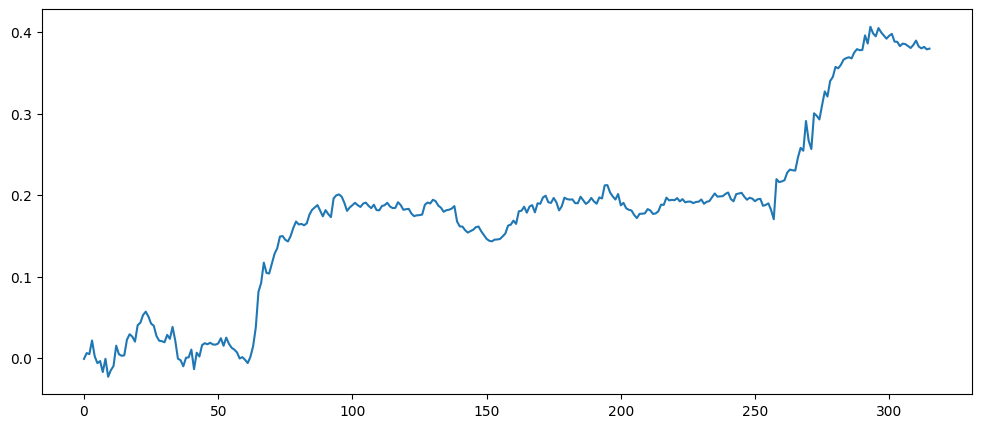

In [641]:
profit = []
for i in tqdm(range(len(test))):
    if test['predict'].iloc[i] > 0:
        profit.append((test.pct.iloc[i])/100)
    if test['predict'].iloc[i] < 0:
        profit.append((-test.pct.iloc[i])/100)
pd.Series(profit).cumsum().plot(figsize=(12,5))


In [603]:
df20.Date.iloc[1]

Timestamp('2017-08-10 09:30:00')

In [604]:
test.Date = pd.to_datetime(test.Date)

In [605]:
test.Date.iloc[1]

Timestamp('2021-04-08 10:15:00')

In [607]:
df20.merge(test[['Date', 'predict']], how = 'left', on = 'Date')

Date    Open    High     Low   Close   Volume  predict
0     2017-08-10 09:15:00   757.9   757.9   755.5   755.5     26.0      NaN
1     2017-08-10 09:30:00   755.1   755.1   753.8   753.8     21.0      NaN
2     2017-08-10 09:45:00   753.6   753.6   752.3   752.3     13.0      NaN
3     2017-08-10 10:00:00   752.0   752.0   750.4   750.4     17.0      NaN
4     2017-08-10 10:15:00   750.0   750.0   748.2   748.2     20.0      NaN
...                   ...     ...     ...     ...     ...      ...      ...
25294 2022-12-08 13:45:00  1076.3  1080.5  1071.0  1071.0  31615.0      NaN
25295 2022-12-08 14:00:00  1069.1  1072.7  1063.2  1063.7  46298.0      NaN
25296 2022-12-08 14:15:00  1062.1  1065.3  1052.5  1065.2  54941.0      NaN
25297 2022-12-08 14:30:00  1064.6  1064.6  1064.6  1064.6    715.0      NaN
25298 2022-12-08 14:45:00  1055.0  1055.0  1055.0  1055.0   8207.0      NaN

[25299 rows x 7 columns]

In [562]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse*10000)

0.7914276098643753


In [541]:
170/316

0.5379746835443038

In [358]:
# df['sum'] = df.sum(axis = 1)
# df_trend = df[['Date', 'sum']]
# df_trend.Date = pd.to_datetime(df_trend.Date)
# df10 = df_trend.loc[df_trend['Date'].dt.time == datetime.time(10, 30)]
# df10.Date = [str(i)[:16] for i in df10.Date]
# df10.Date = pd.to_datetime(df10.Date)
# df20.Date = pd.to_datetime(df20.Date)
# signal = df20.merge(df10, how = 'left', on = 'Date')
# signal.Date = pd.to_datetime(signal.Date)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9528\530587072.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['sum'] = df.sum(axis = 1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9528\530587072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trend.Date = pd.to_datetime(df_trend.Date)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9528\530587072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [359]:
signal

Date    Open    High     Low   Close   Volume  sum
0     2017-08-10 09:15:00   757.9   757.9   755.5   755.5     26.0  NaN
1     2017-08-10 09:30:00   755.1   755.1   753.8   753.8     21.0  NaN
2     2017-08-10 09:45:00   753.6   753.6   752.3   752.3     13.0  NaN
3     2017-08-10 10:00:00   752.0   752.0   750.4   750.4     17.0  NaN
4     2017-08-10 10:15:00   750.0   750.0   748.2   748.2     20.0  NaN
...                   ...     ...     ...     ...     ...      ...  ...
25265 2022-12-07 10:00:00  1050.5  1052.4  1044.6  1048.7  29597.0  NaN
25266 2022-12-07 10:15:00  1048.8  1051.8  1044.4  1045.8  22163.0  NaN
25267 2022-12-07 10:30:00  1046.4  1047.4  1041.3  1044.7  24524.0  NaN
25268 2022-12-07 10:45:00  1044.6  1048.5  1044.2  1045.8  21633.0  NaN
25269 2022-12-07 11:00:00  1045.9  1051.0  1045.9  1050.4  21020.0  NaN

[25270 rows x 7 columns]

In [282]:
# pd.Series(profit).sum()
# len(profit)
print('sum: ', pd.Series(profit).sum())
print('len: ', len(profit))
#xac suat thang
d=0
a=0
for i in profit:
    if i > 0:
        d += 1
    if i < 0:
        a += 1
print('win rate: ', d/(d+a))
print('profit:')
s=0
for i in range(10,30):
    print(profit[-i])
    s = s+profit[-i]
print(s)

sum:  202.10000000000025
len:  32
win rate:  0.65625
profit:
14.299999999999955
-1.0
9.799999999999955
2.7999999999999545
3.2999999999999545
-13.300000000000068
0.5
4.5
2.5
3.6000000000000227
2.6000000000000227
12.200000000000045
6.100000000000023
-3.5
7.0
-5.0
18.700000000000045
6.0
-2.0
7.0
76.09999999999991


In [271]:
haha = pd.DataFrame()
haha['Date'] = date
haha['pos'] = pos
haha

Date  pos
0 2017-08-23 10:30:00    1
1 2017-11-06 14:45:00    0
2 2018-01-16 10:30:00    1
3 2018-01-16 14:45:00    0

In [185]:
# test = data_q1[0]
# test = test.loc[test.duplicated(subset=['Date','stock'],keep='first')]
# test.pivot(index=['Date'],columns=['stock'],values=['Close'])

In [194]:
# vn30_com = pd.read_csv('VN30_qua_cac_nam.csv').iloc[:,1:].T
# vn30_com = vn30_com.reset_index()
# vn30_com['index'] = pd.to_datetime(vn30_com['index']).dt.date
# vn30_com_date_lis = vn30_com['index'].tolist()

In [205]:

# vn30_df = pd.DataFrame()
# for i in tqdm(vn30_com_date_lis):
#     stock_lis = vn30_com.loc[vn30_com['index']==i,:].drop('index',axis=1).values.tolist()[0]
#     for stock in stock_lis:
#         df1 = pd.read_csv('T:/Data/Data/Data_Co_So_minute/DataMinute2/DataMinute/DataMinute/'+stock+'.csv')
#         df1['Date'] = pd.to_datetime(df1['Date'])
#         df1['stock'] = stock
#         if i!=vn30_com_date_lis[-1]:
#             df1 = df1.loc[(df1['Date'].dt.date>=i)&(df1['Date'].dt.date<=vn30_com_date_lis[vn30_com_date_lis.index(i)+1])]
#             df1['group'] = vn30_com_date_lis.index(i)
#             vn30_df = pd.concat([vn30_df,df1])
#         else:
#             df1 = df1.loc[(df1['Date'].dt.date>=i)]
#             df1['group'] = vn30_com_date_lis.index(i)
#             vn30_df = pd.concat([vn30_df,df1])
# vn30_df = vn30_df.sort_values('Date')
# vn30_df['Date'] = vn30_df['Date']+timedelta(hours=7)
# # vn30_df.to_csv('vn30_df.csv')
# vn30_df['day'] = pd.to_datetime(vn30_df['Date']).dt.date
# vn30_df.loc[vn30_df['group']==0].pivot(index=['Date'],columns=['stock'],values=['Close'])
